## Final Project Submission

Please fill out:
* Student name: Zakaria Abdi
* Student pace: full time
* Scheduled project review date/time: 09/07/2023
* Instructor name: Mark Tiba
* Blog post URL:


# Project Overview
![Seasonal Home Sales](Image.jpeg)



The goal of this project is to analyze and predict housing prices in order to assist a real estate company in making informed decisions. The company aims to renovate homes and sell them at higher prices. We will utilize a dataset containing various features of houses, such as the number of bedrooms, bathrooms, square footage, location, condition, and grade.

Through this project, we aim to support the stakeholder in making data-driven decisions regarding home renovations and pricing strategies. By understanding the factors that influence housing prices, the company can maximize their return on investment and profitability. Additionally, we will investigate the seasonality of home sales to identify the best time periods for selling renovated properties.

# Business Understanding

 SmartRenovate Realty is a real estate company specializing in purchasing and renovating properties with the goal of increasing their market value and profitability. Their objective is to identify strategic renovation opportunities that will yield the highest return on investment and enable them to sell the properties at higher prices.

The key objectives of this analysis for SmartRenovate Realty are as follows:

Identify high-impact renovation areas: By analyzing the relationship between different property features and sale prices, SmartRenovate Realty aims to identify the key renovation areas that have the potential to significantly increase the value of properties. This understanding will guide them in making informed decisions about which areas to focus on during the renovation process.

Evaluate the cost-effectiveness of renovations: Understanding the impact of specific renovation projects, such as bathroom renovations will enable SmartRenovate Realty to assess the cost-effectiveness of each project. They can prioritize renovations that offer a high return on investment and avoid unnecessary expenses on renovations that may not significantly impact property values.


Identify seasonal trends in the real estate market: SmartRenovate Realty aims to identify patterns and trends in the market that are specific to different seasons. They want to understand if certain seasons exhibit higher demand, increased competition, or price fluctuations in the real estate market.

By addressing these objectives, SmartRenovate Realty aims to enhance the market value of their properties through strategic renovations. This analysis will enable them to make data-driven decisions when selecting renovation projects, prioritize areas for improvement, and align their efforts with market trends and buyer preferences. Ultimately, SmartRenovate Realty aims to increase the selling prices of their renovated properties and maximize their returns on investment in the real estate market.


## Data Overview

We are using data from King's county Washington to create this model.
Let's check out the data first.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Let's Check out the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preprocessing 

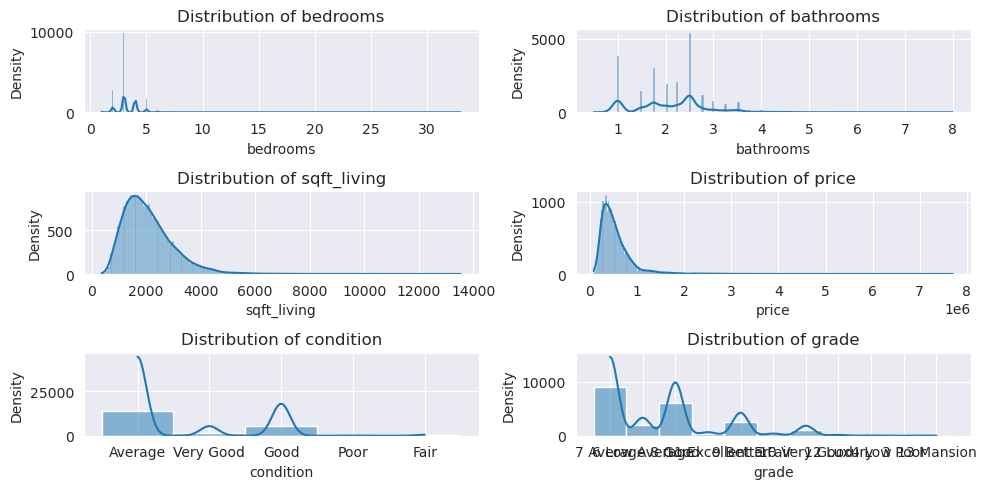

In [6]:
# checking the distribution of some columns

columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'price','condition','grade']

fig, axes = plt.subplots(nrows=3,ncols=2, figsize=(10,5))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [7]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Checking for Duplicated Data

In [8]:
df.duplicated().sum()

0

### Checking for Outliers

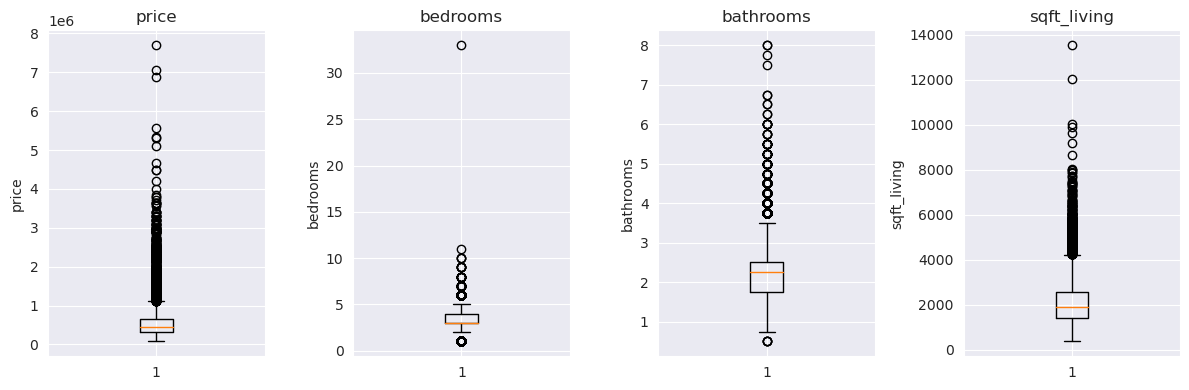

In [9]:
variables_of_interest = ['price', 'bedrooms', 'bathrooms', 'sqft_living']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables_of_interest), figsize=(12, 4))

# Iterate through each variable and create box plots
for i, variable in enumerate(variables_of_interest):
    axes[i].boxplot(df[variable])
    axes[i].set_title(variable)
    axes[i].set_ylabel(variable)
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

## Data Cleaning

### Missing Data

In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
## Let's drop the yr_renovated column
df.drop('yr_renovated', axis=1, inplace=True)
## Let's fill all the Nulls in Waterfront with 0
df['waterfront'].fillna('NO', inplace=True)

In [12]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [13]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: np.ceil(x))

In [14]:
view_dict = {np.nan:0,'NONE':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'EXCELLENT':4}
df.view.replace(to_replace=view_dict,inplace=True)

### Outliers

In [15]:
import pandas as pd
import numpy as np

# Select the variable of interest
variable_of_interest = ['price', 'bedrooms']

for variable in variables_of_interest:
    # Calculate z-scores for the variable
    z_scores = np.abs((df[variable] - df[variable].mean()) / df[variable].std())
    
    # Set a threshold for z-score to identify outliers
    z_score_threshold = 3
    
    # Filter the dataset to exclude outliers for the current variable
    df = df[z_scores <= z_score_threshold]

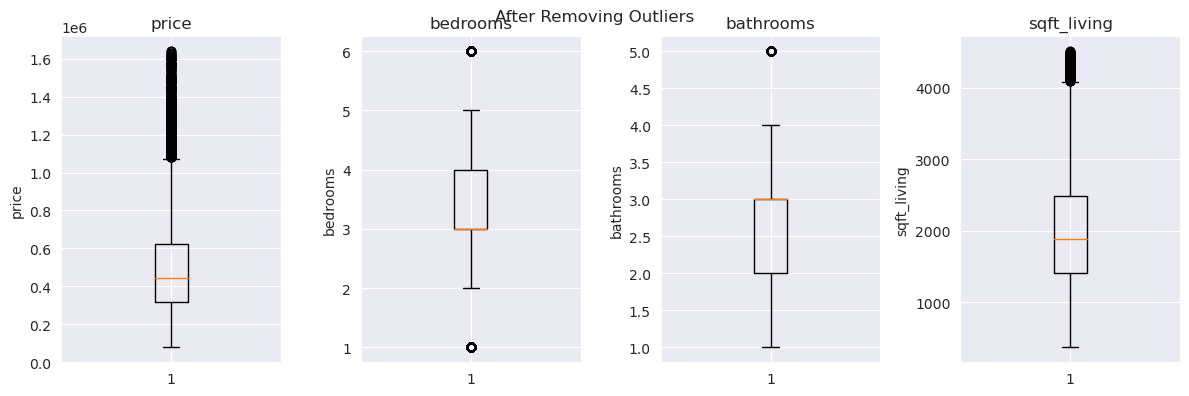

In [16]:
variables_of_interest = ['price', 'bedrooms', 'bathrooms', 'sqft_living']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=len(variables_of_interest), figsize=(12, 4))

# Iterate through each variable and create box plots
for i, variable in enumerate(variables_of_interest):
    axes[i].boxplot(df[variable])
    axes[i].set_title(variable)
    axes[i].set_ylabel(variable)
    
# Adjust spacing between subplots
plt.tight_layout()
plt.suptitle('After Removing Outliers')
# Display the plots
plt.show()

#### Relation Of Variables To Each Other.

/tmp/ipykernel_14632/4033124694.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


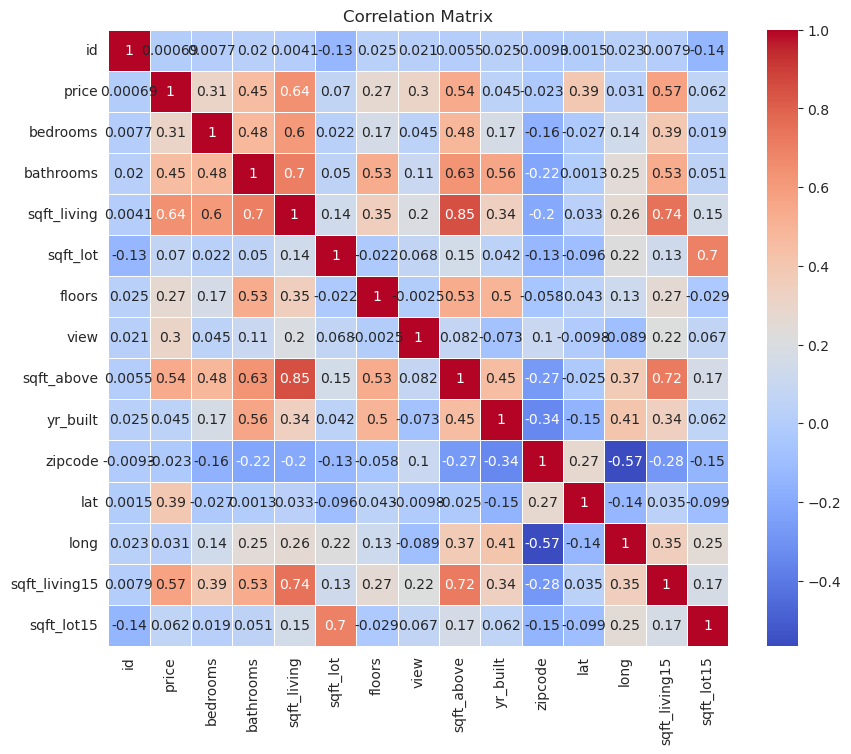

In [17]:
# checking for the feature correlation
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## One Hot Encoding

In [18]:
df['date'] = pd.to_datetime(df['date'])

# Extract month from the 'date' column
df['month'] = df['date'].dt.month

# Map month to season
seasons = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
}
df['season'] = df['month'].map(seasons)

# Perform one-hot encoding on the 'season' variable
one_hot = pd.get_dummies(df['season'], prefix='season', drop_first=True)
df = pd.concat([df, one_hot], axis=1)

# Drop the original 'date', 'month', and 'season' columns
df = df.drop(['date', 'month', 'season'], axis=1)

# Display the updated dataframe
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,season_Spring,season_Summer,season_Winter
0,7129300520,221900.0,3,1.0,1180,5650,1.0,NO,0,Average,...,0.0,1955,98178,47.5112,-122.257,1340,5650,0,0,0
1,6414100192,538000.0,3,3.0,2570,7242,2.0,NO,0,Average,...,400.0,1951,98125,47.7210,-122.319,1690,7639,0,0,1
2,5631500400,180000.0,2,1.0,770,10000,1.0,NO,0,Average,...,0.0,1933,98028,47.7379,-122.233,2720,8062,0,0,1
3,2487200875,604000.0,4,3.0,1960,5000,1.0,NO,0,Very Good,...,910.0,1965,98136,47.5208,-122.393,1360,5000,0,0,1
4,1954400510,510000.0,3,2.0,1680,8080,1.0,NO,0,Average,...,0.0,1987,98074,47.6168,-122.045,1800,7503,0,0,1


In [19]:
df['waterfront'] = df['waterfront'].replace('None', 'NO')
df['waterfront'].value_counts()

NO     20865
YES       78
Name: waterfront, dtype: int64

In [20]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [21]:
import pandas as pd
# Perform one-hot encoding on the 'condition' column
condition_one_hot = pd.get_dummies(df['condition'], prefix='condition')

# Concatenate the one-hot encoded columns with the original dataframe
df = pd.concat([df,condition_one_hot], axis=1)

# Drop the original 'condition' and 'grade' columns
df = df.drop('condition', axis=1)

# Display the updated dataframe
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,sqft_living15,sqft_lot15,season_Spring,season_Summer,season_Winter,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,7129300520,221900.0,3,1.0,1180,5650,1.0,NO,0,7 Average,...,1340,5650,0,0,0,1,0,0,0,0
1,6414100192,538000.0,3,3.0,2570,7242,2.0,NO,0,7 Average,...,1690,7639,0,0,1,1,0,0,0,0
2,5631500400,180000.0,2,1.0,770,10000,1.0,NO,0,6 Low Average,...,2720,8062,0,0,1,1,0,0,0,0
3,2487200875,604000.0,4,3.0,1960,5000,1.0,NO,0,7 Average,...,1360,5000,0,0,1,0,0,0,0,1
4,1954400510,510000.0,3,2.0,1680,8080,1.0,NO,0,8 Good,...,1800,7503,0,0,1,1,0,0,0,0


In [22]:
# Perform one-hot encoding on the 'grade' column
one_hot = pd.get_dummies(df['grade'], prefix='grade')

# Concatenate the one-hot encoded features to the original dataframe
df = pd.concat([df, one_hot], axis=1)

# Drop the original 'grade' column
df = df.drop('grade', axis=1)

In [23]:
water_location = {'Duwamish':[98168],
'Elliott Bay':[98119,98104,98129,98132,98127,98125,98195,98101,98134,98170,98139,98131,98181], 
'Puget Sound':[98071,98083,98013,98070,98031,98131,98063,98195,98207,98190], 
'Lake Union':[98109], 
'Ship Canal':[00000], 
'Lake Washington':[98072,98077], 
'Lake Sammamish':[98074,98075,98029], 
'other lake':[00000], 
'river/slough waterfronts':[00000]}

# list to contain new column data
waterfront_list = []

# for loop to assign waterfront based on zipcode
for zipcode in df.zipcode:
    for k,v in water_location.items():
        if zipcode in v:
            waterfront_list.append(k)
            appended = True
            break
        else: 
            appended = False
    if not appended:
        waterfront_list.append('NONE')


df['waterfront_loc'] = waterfront_list

# one-hot encoding waterfront_loc
waterfront_dummies = pd.get_dummies(df.waterfront_loc,prefix='waterfront',prefix_sep='_').drop('waterfront_NONE',axis=1)
df = pd.concat([df,waterfront_dummies],axis=1)
df = df.drop(['zipcode','waterfront_loc'],axis=1) 

In [24]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'season_Spring', 'season_Summer', 'season_Winter', 'condition_Average',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'waterfront_Duwamish', 'waterfront_Elliott Bay',
       'waterfront_Lake Sammamish', 'waterfront_Lake Union',
       'waterfront_Lake Washington', 'waterfront_Puget Sound'],
      dtype='object')

In [25]:
df.corr()['price'].sort_values(ascending=False)[1:]

/tmp/ipykernel_14632/329675028.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending=False)[1:]


sqft_living                   0.643080
sqft_living15                 0.572902
sqft_above                    0.536949
bathrooms                     0.452043
lat                           0.394527
grade_10 Very Good            0.358856
grade_9 Better                0.356182
bedrooms                      0.307355
view                          0.304495
floors                        0.268764
grade_11 Excellent            0.233815
waterfront_Lake Sammamish     0.153404
grade_8 Good                  0.094823
grade_12 Luxury               0.090843
waterfront_Lake Union         0.082660
sqft_lot                      0.070020
condition_Very Good           0.065050
sqft_lot15                    0.061708
waterfront_Lake Washington    0.057031
yr_built                      0.044860
waterfront_Elliott Bay        0.036978
long                          0.030722
season_Spring                 0.027574
season_Summer                 0.015383
condition_Average             0.005434
id                       

#### As we can expect some features are highly correlated with each other which may affect our model so we need to deal with that.

In [26]:
# Calculate the correlation matrix
corr = df.corr()

# Identify features with correlation >= 0.30 with 'price'
corr_price = corr['price'].drop('price')
highly_correlated_price = corr_price[corr_price >= 0.30]

# Create a dataframe of correlated features with their correlations to 'price'
corr_price_df = pd.DataFrame({'Correlations': highly_correlated_price, 'Features': highly_correlated_price.index}).sort_values(by='Correlations', ascending=False)

# Identify multicollinear features
multicollinear_features = []
multicollinear_corr = []

def check_multicollinearity(feature):
    for idx, correlation in corr[feature].iteritems():
        if correlation >= 0.80 and idx != feature:
            multicollinear_features.append((feature, idx))
            multicollinear_corr.append(correlation)

# Iterate over each feature to check for multicollinearity
for feature in corr:
    check_multicollinearity(feature)

# Create a dataframe of multicollinear features with their correlations
multicollinear_df = pd.DataFrame({'Correlations': multicollinear_corr, 'Features': multicollinear_features}).sort_values(by='Correlations', ascending=False)

print('Correlations with Price:')
print(corr_price_df)

print('Multicollinear Features:')
print(multicollinear_df)

/tmp/ipykernel_14632/4109620887.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Correlations with Price:
                    Correlations            Features
sqft_living             0.643080         sqft_living
sqft_living15           0.572902       sqft_living15
sqft_above              0.536949          sqft_above
bathrooms               0.452043           bathrooms
lat                     0.394527                 lat
grade_10 Very Good      0.358856  grade_10 Very Good
grade_9 Better          0.356182      grade_9 Better
bedrooms                0.307355            bedrooms
view                    0.304495                view
Multicollinear Features:
   Correlations                   Features
0      0.852492  (sqft_living, sqft_above)
1      0.852492  (sqft_above, sqft_living)


/tmp/ipykernel_14632/4109620887.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, correlation in corr[feature].iteritems():


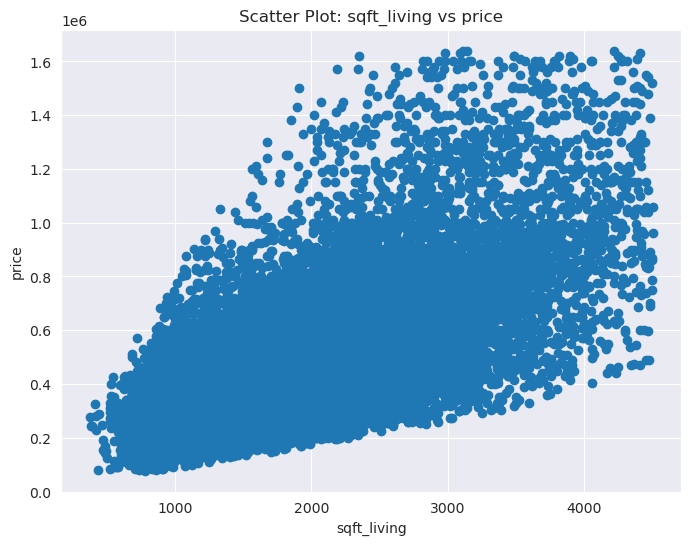

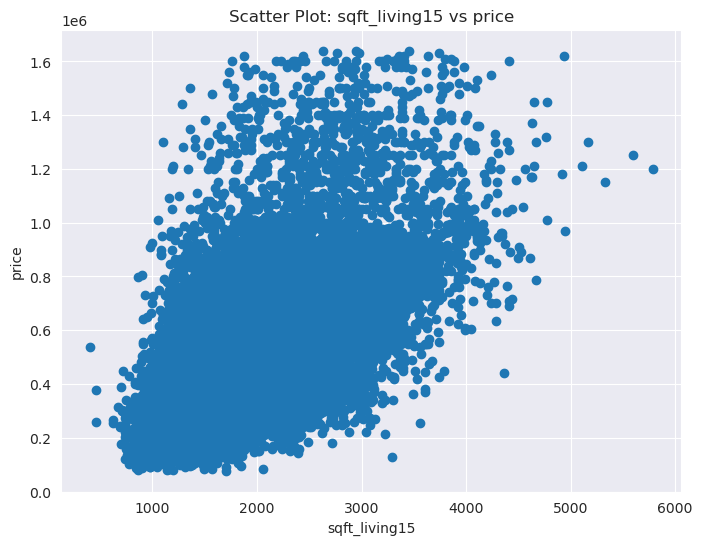

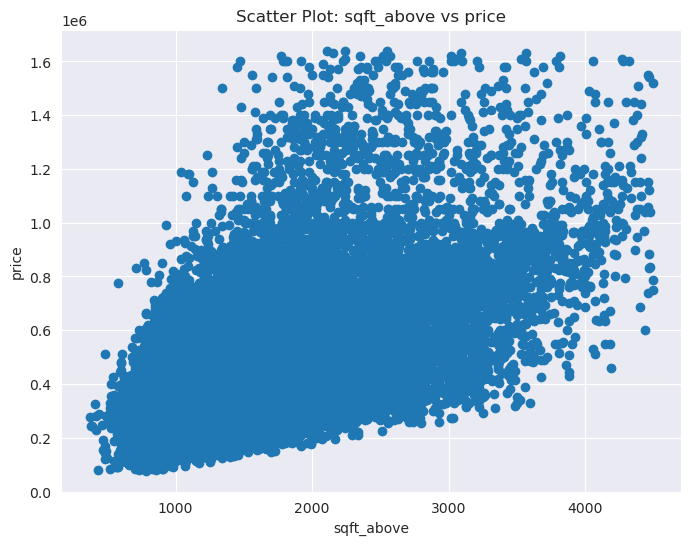

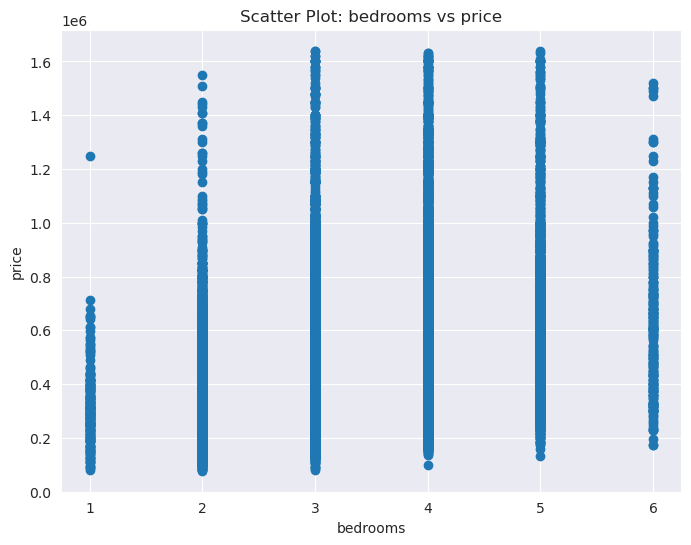

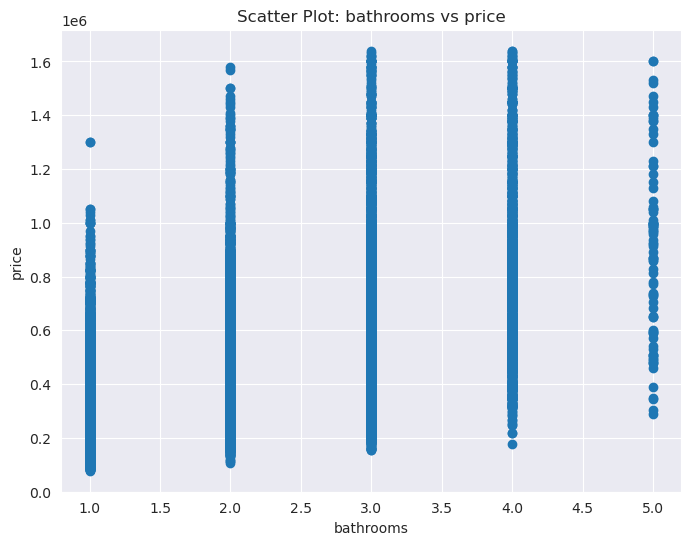

In [27]:
# Linearity
features = ['sqft_living', 'sqft_living15', 'sqft_above', 'bedrooms', 'bathrooms']

# Create scatter plots
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(f'Scatter Plot: {feature} vs price')
    plt.show()

/tmp/ipykernel_14632/1952501663.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ot = sns.distplot(df.price, ax=ax1).set_title('Distribution after Outlier Removal\n', fontsize=24)
/tmp/ipykernel_14632/1952501663.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  lo = sns.distplot(y_log, ax=ax2).set_title('Log-transf

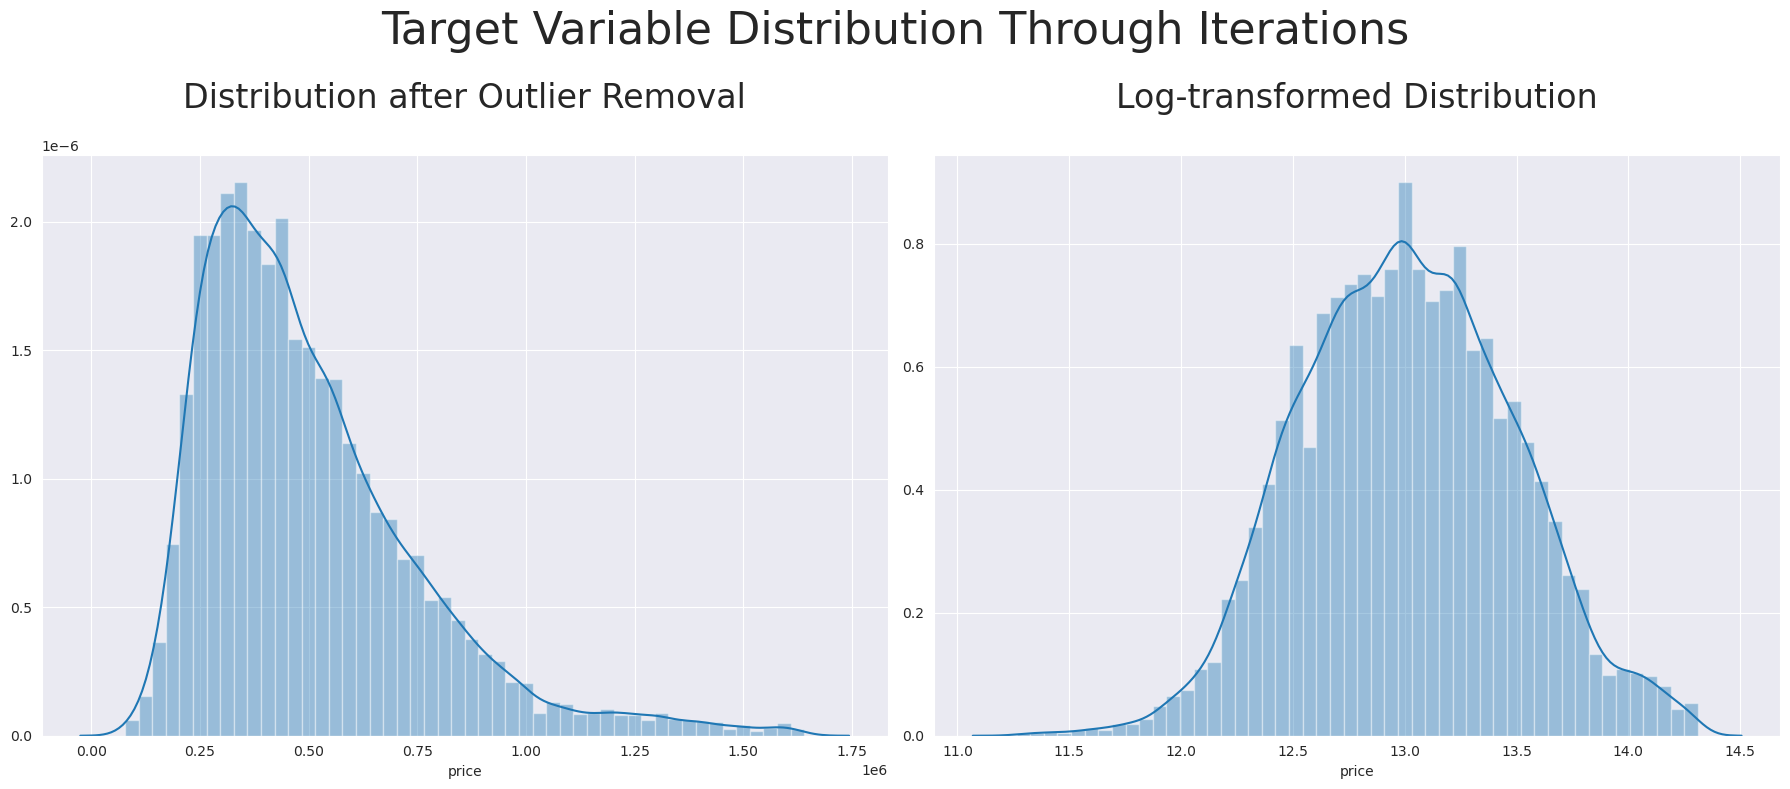

In [28]:
### Perform log transformation on the target variable
y_log = np.log(df['price'])

# Create subplots for the distribution plots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the distribution after eliminating extreme outliers
ot = sns.distplot(df.price, ax=ax1).set_title('Distribution after Outlier Removal\n', fontsize=24)

# Plot the distribution after log transformation
lo = sns.distplot(y_log, ax=ax2).set_title('Log-transformed Distribution\n', fontsize=24)

# Remove ylabel for all subplots
ax1.set_ylabel("")
ax2.set_ylabel("")

# Set the figure size and suptitle
plt.gcf().set_size_inches(18, 8)
plt.suptitle("Target Variable Distribution Through Iterations", fontsize=32)

# Adjust the spacing and display the plots
fig.tight_layout()
plt.show()

### Modeling

In [29]:
X = df[['sqft_living','bathrooms']]

In [32]:

X = sm.add_constant(X)
#baseline linear regression model
model = sm.OLS(df['price'], X)
model_1 = model.fit()

# Print the summary of the baseline model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     7383.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:06:41   Log-Likelihood:            -2.8455e+05
No. Observations:               20943   AIC:                         5.691e+05
Df Residuals:                   20940   BIC:                         5.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.519e+04   4058.943     20.989      

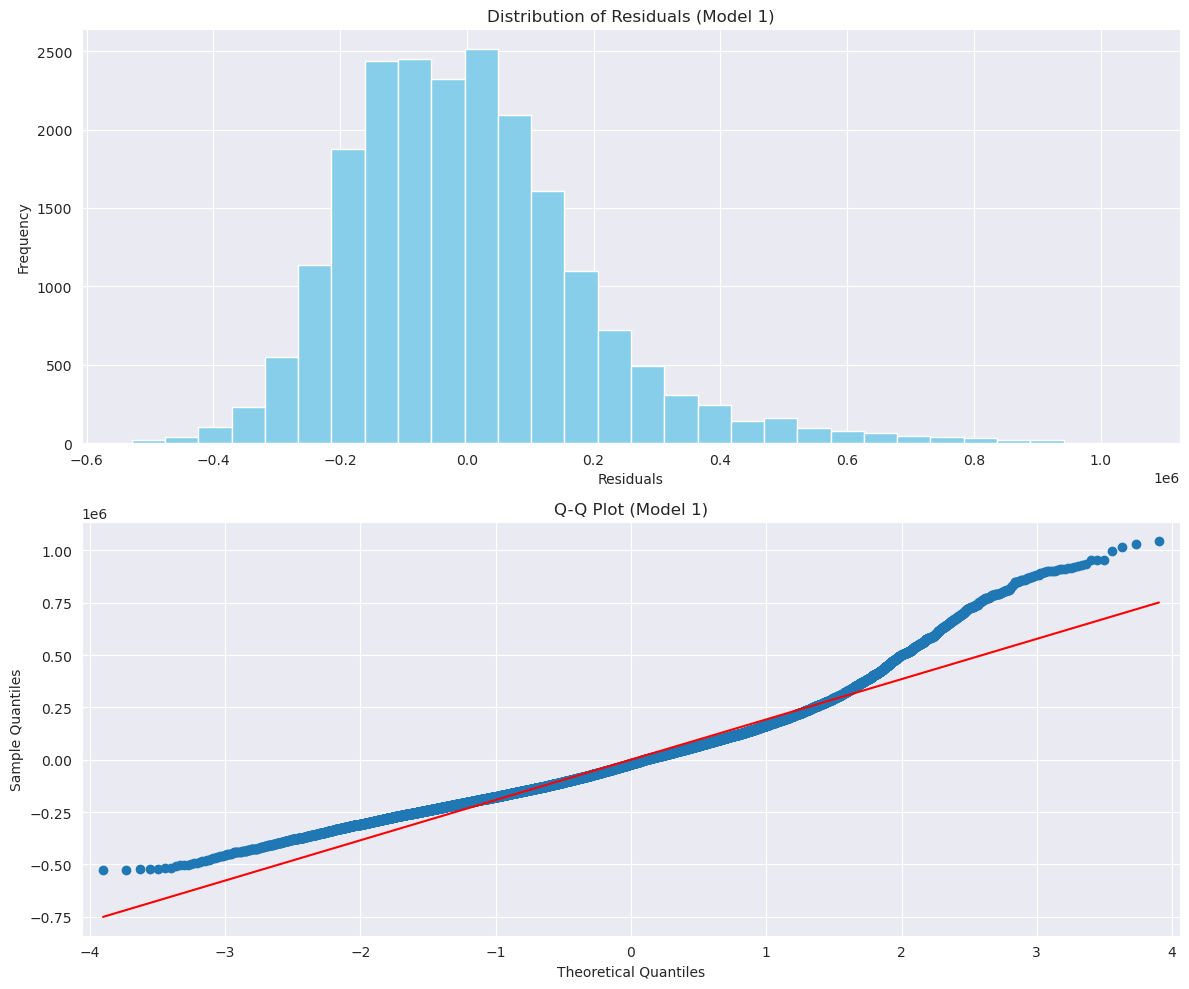

In [33]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 10))

# Plot the distribution of residuals for the baseline model
ax1.hist(model_1.resid, bins=30, color='skyblue')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Residuals (Model 1)')
ax1.grid(True)

# Q-Q plot for the baseline model
sm.qqplot(model_1.resid, line='s', ax=ax2)
ax2.set_title('Q-Q Plot (Model 1)')
ax2.grid(True)
# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

#### First Model Evaluation

The OLS regression model evaluated on the dataset has an R-squared value of 0.409, indicating that approximately 40.9% of the variation in the target variable (price) can be explained by the predictor variable (sqft_living).

The coefficient for the sqft_living predictor is 0.0004, suggesting that for every one unit increase in square footage of the living area, the predicted price of the house increases by 0.0004 units, holding other variables constant.

The constant term (intercept) in the model is 12.2249. It represents the estimated price when the square footage of the living area is zero, which is not meaningful in this context.

The p-values for both coefficients are very close to zero, indicating that they are statistically significant.

The model has a high F-statistic value of 1.448e+04, and the associated p-value is zero, suggesting that the model is statistically significant and provides a better fit to the data compared to a model with no predictors.

However, the large condition number (5.92e+03) suggests the possibility of strong multicollinearity or other numerical problems. Further investigation is required to assess the presence of multicollinearity and ensure the reliability of the model.

Overall, the model shows a moderate level of predictive power with the sqft_living variable, but additional analysis is needed to assess the significance of other predictors and address the potential multicollinearity issue.

### Model 2

### Let's use more features to include in our model.
So we can find more relations to the price

In [34]:
X = df[['sqft_living','sqft_living15','sqft_above','bathrooms','bedrooms','view']]
X = sm.add_constant(X)
#baseline linear regression model
model = sm.OLS(y_log, X)
model_2 = model.fit()

# Print the summary of the baseline model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     2892.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:06:47   Log-Likelihood:                -7916.7
No. Observations:               20943   AIC:                         1.585e+04
Df Residuals:                   20936   BIC:                         1.590e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.1981      0.011   1086.037

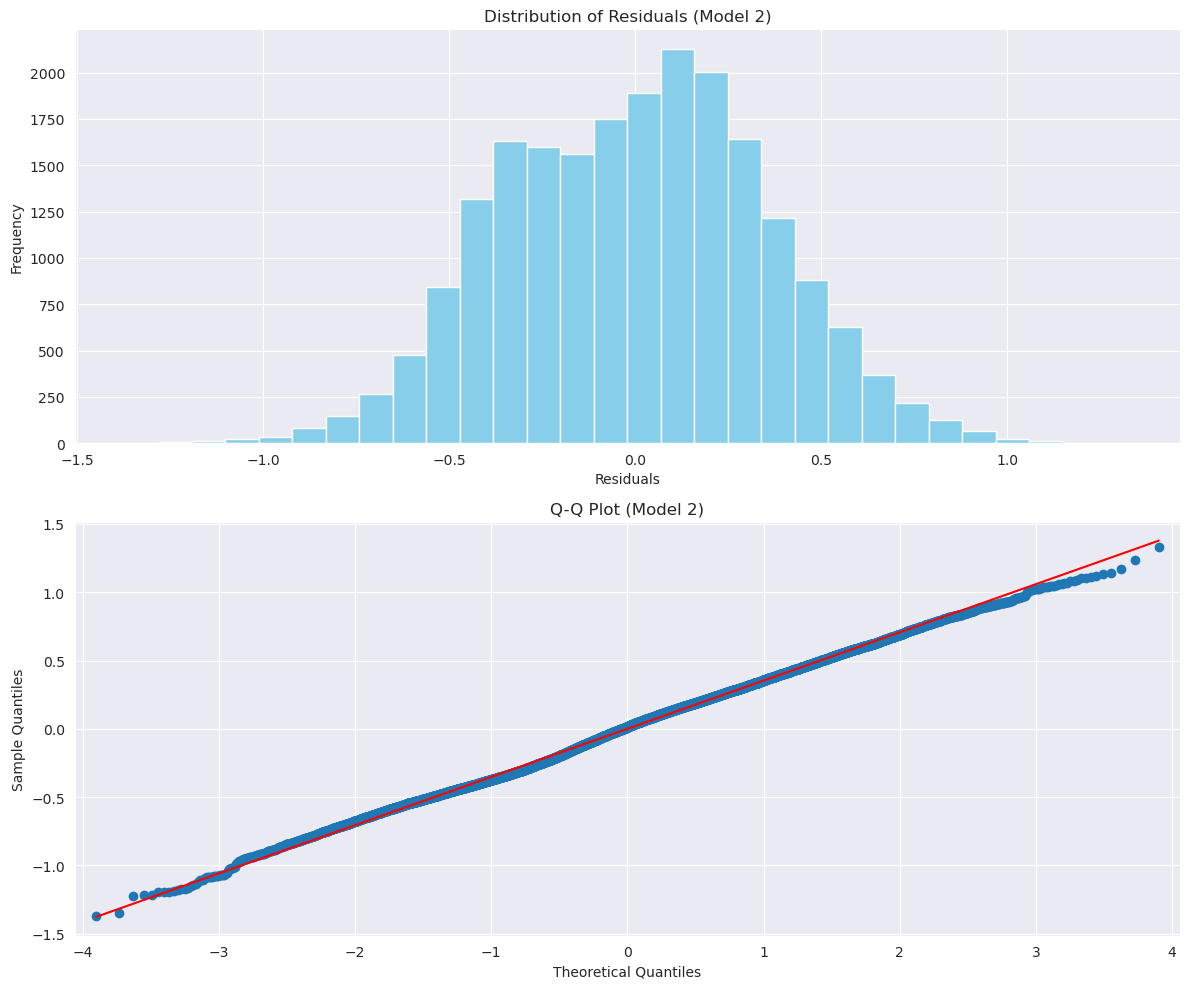

In [35]:
# Create a figure with 2 rows and 2 columns
fig, (ax1,ax2) = plt.subplots(2, figsize=(12, 10))

# Plot the distribution of residuals for the baseline model
ax1.hist(model_2.resid, bins=30, color='skyblue')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Residuals (Model 2)')
ax1.grid(True)

# Q-Q plot for the baseline model
sm.qqplot(model_2.resid, line='s', ax=ax2)
ax2.set_title('Q-Q Plot (Model 2)')
ax2.grid(True)
# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

#### It seems we were too lenient on the multicollinearity issue by using 0.80 let's use 0.70 for our next model 

In [36]:
# Calculate the correlation matrix
corr = df.corr()

# Identify features with correlation >= 0.30 with 'price'
corr_price = corr['price'].drop('price')
highly_correlated_price = corr_price[corr_price >= 0.30]

# Create a dataframe of correlated features with their correlations to 'price'
corr_price_df = pd.DataFrame({'Correlations': highly_correlated_price, 'Features': highly_correlated_price.index}).sort_values(by='Correlations', ascending=False)

# Identify multicollinear features
multicollinear_features = []
multicollinear_corr = []

def check_multicollinearity(feature):
    for idx, correlation in corr[feature].iteritems():
        if correlation >= 0.70 and idx != feature:
            multicollinear_features.append((feature, idx))
            multicollinear_corr.append(correlation)

# Iterate over each feature to check for multicollinearity
for feature in corr:
    check_multicollinearity(feature)

# Create a dataframe of multicollinear features with their correlations
multicollinear_df = pd.DataFrame({'Correlations': multicollinear_corr, 'Features': multicollinear_features}).sort_values(by='Correlations', ascending=False)

print('Correlations with Price:')
print(corr_price_df)

print('Multicollinear Features:')
print(multicollinear_df)

/tmp/ipykernel_14632/2614693665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Correlations with Price:
                    Correlations            Features
sqft_living             0.643080         sqft_living
sqft_living15           0.572902       sqft_living15
sqft_above              0.536949          sqft_above
bathrooms               0.452043           bathrooms
lat                     0.394527                 lat
grade_10 Very Good      0.358856  grade_10 Very Good
grade_9 Better          0.356182      grade_9 Better
bedrooms                0.307355            bedrooms
view                    0.304495                view
Multicollinear Features:
   Correlations                      Features
2      0.852492     (sqft_living, sqft_above)
4      0.852492     (sqft_above, sqft_living)
3      0.744009  (sqft_living, sqft_living15)
6      0.744009  (sqft_living15, sqft_living)
5      0.716004   (sqft_above, sqft_living15)
7      0.716004   (sqft_living15, sqft_above)
0      0.702556      (bathrooms, sqft_living)
1      0.702556      (sqft_living, bathrooms)


/tmp/ipykernel_14632/2614693665.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, correlation in corr[feature].iteritems():


#### Let's Drop the sqft_living15 as it seems to cause collinearity issues.

#### We will create the final model and include in it all the variables that would help us in the decision making.

### Model 3

### Let's include all the features that would help us to make good business desicions

In [37]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'season_Spring', 'season_Summer', 'season_Winter', 'condition_Average',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'waterfront_Duwamish', 'waterfront_Elliott Bay',
       'waterfront_Lake Sammamish', 'waterfront_Lake Union',
       'waterfront_Lake Washington', 'waterfront_Puget Sound'],
      dtype='object')

In [38]:
X = df[['sqft_living','view','sqft_lot','sqft_lot15',
       'yr_built', 'lat', 'long','bathrooms','bedrooms',
       'season_Spring', 'season_Summer', 'season_Winter', 'condition_Average',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'waterfront_Duwamish', 'waterfront_Elliott Bay',
       'waterfront_Lake Sammamish', 'waterfront_Lake Union',
       'waterfront_Lake Washington', 'waterfront_Puget Sound','grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better']]
X = sm.add_constant(X)
#baseline linear regression model
model = sm.OLS(y_log, X)
model_3 = model.fit()

# Print the summary of the baseline model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1892.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:06:54   Log-Likelihood:                -246.45
No. Observations:               20943   AIC:                             556.9
Df Residuals:                   20911   BIC:                             811.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

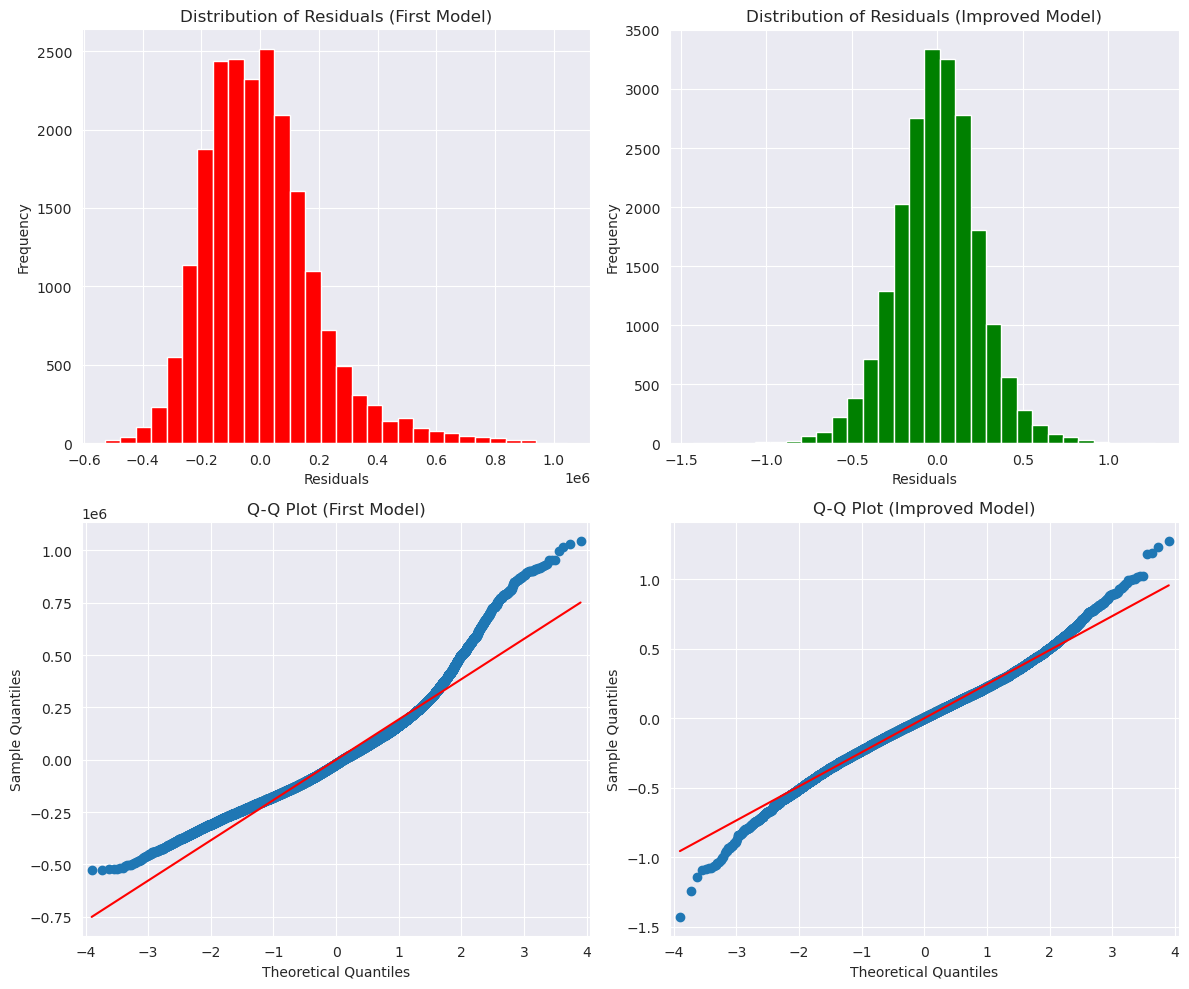

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distribution of residuals for the baseline model
axs[0, 0].hist(model_1.resid, bins=30, color='red')
axs[0, 0].set_xlabel('Residuals')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Residuals (First Model)')
axs[0, 0].grid(True)

# Plot the distribution of residuals for the improved model
axs[0, 1].hist(model_3.resid, bins=30, color='green')
axs[0, 1].set_xlabel('Residuals')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Residuals (Improved Model)')
axs[0, 1].grid(True)

# Q-Q plot for the baseline model
sm.qqplot(model_1.resid, line='s', ax=axs[1, 0])
axs[1, 0].set_title('Q-Q Plot (First Model)')
axs[1, 0].grid(True)

# Q-Q plot for the improved model
sm.qqplot(model_3.resid, line='s', ax=axs[1, 1])
axs[1, 1].set_title('Q-Q Plot (Improved Model)')
axs[1, 1].grid(True)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

#### The third model  has an R-squared value of 0.737, indicating that it explains approximately 73.7% of the variance in the target variable. This R-squared value is higher compared to the first model, suggesting that the third model captures a larger proportion of the variation in house prices.

#### The third model includes multiple predictors such as "sqft_living", "view", "bathrooms", "bedrooms", "seasons", "condition", "waterfront", and "grade". Each predictor has a coefficient associated with it, indicating the expected change in the price for a one-unit increase in the predictor, holding other variables constant.

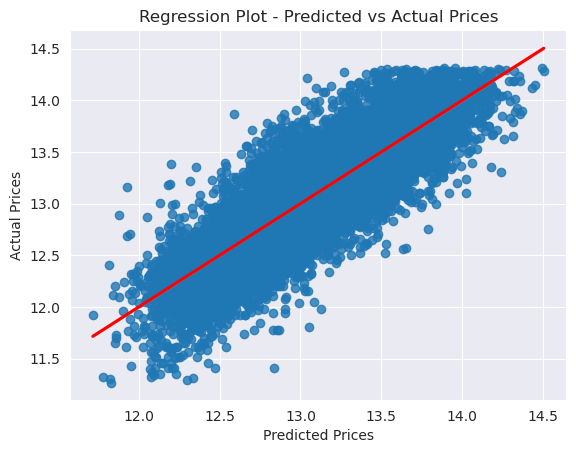

In [40]:
df_results = pd.DataFrame({'Predicted': model_3.predict(), 'Actual': y_log})

# Plot the regression line
sns.regplot(x='Predicted', y='Actual', data=df_results, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Regression Plot - Predicted vs Actual Prices')

# Display the plot
plt.show()

### Factors the company should consider:

### Size

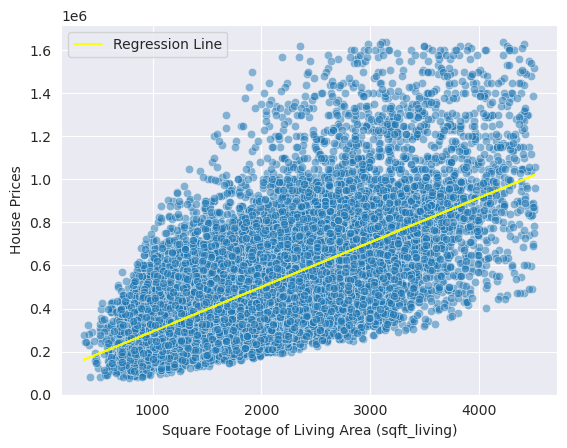

In [41]:
#Calculate the regression line
intercept = model_1.params['const']
slope = model_1.params['sqft_living']
reg_line = intercept + slope * df['sqft_living']

# Create the plot
plt.plot(df['sqft_living'], reg_line, color='yellow', label='Regression Line',alpha=0.9)
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
# Set the x and y labels
plt.xlabel('Square Footage of Living Area (sqft_living)')
plt.ylabel('House Prices')

# Show the plot
plt.show()

This shows a positive influence of the size of the house on the price. As such the company should try to buy homes of smaller sizes and renovate them to turn over a huge profit.
This is a directly proportional relationship.

## Location

#### The Properties down at Lake Union have the highest co-efficient among the water-related areas and thus the highest correlation.

In [42]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'sqft_above', 'sqft_basement',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'season_Spring', 'season_Summer', 'season_Winter', 'condition_Average',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'waterfront_Duwamish', 'waterfront_Elliott Bay',
       'waterfront_Lake Sammamish', 'waterfront_Lake Union',
       'waterfront_Lake Washington', 'waterfront_Puget Sound'],
      dtype='object')

In [ ]:
import folium

# Filter the DataFrame for properties on Lake Union
lake_union_properties = df[df['waterfront_Lake Union'] == 1][['lat', 'long', 'price']]

# Create a Folium map centered around Lake Union
lake_union_map = folium.Map(location=[47.6477, -122.3344], zoom_start=13)

# Add markers for each property on Lake Union to the map
for index, row in lake_union_properties.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        tooltip=f"Price: ${row['price']}",
        icon=folium.Icon(color='red', icon='home')
    ).add_to(lake_union_map)

# Display the map
lake_union_map


The visualization above shows the Area on Lake Union and the properties that are on it since that was the region 
showed by the model to have the highest relation to price.
Also if you hover above a point it shows you the price of that particular home.

## Seasons

In [ ]:
# Coefficients of the season variables from the regression results
season_coefficients = {
    'Spring': 0.0491,
    'Summer': 0.0070,
    'Winter': 0.0028
}

# Creating a dataframe from the coefficients
data = {'Season': list(season_coefficients.keys()), 'Coefficient': list(season_coefficients.values())}
df_1 = pd.DataFrame(data)

# Plotting the coefficients using Seaborn's barplot
sns.barplot(x='Season', y='Coefficient', data=df_1)
plt.xlabel('Season')
plt.ylabel('Coefficient')
plt.title('Coefficients of Season Variables')
plt.show()


The visualization above shows that the spring season is the best season in relation to price.
That means spring is when homes are the most expensive and winters are the least expensive.

# Recommendations

Seasonal Considerations: The visualization reveals that the spring season has the highest prices, while winters have the lowest prices. It is recommended to take advantage of this seasonal trend by strategically timing property listings and marketing efforts to coincide with the spring season. This can potentially maximize profits by capitalizing on the higher demand and prices during this period.

Focus on Lake Union Properties: The map visualization showcases properties on Lake Union, as it was identified by the model as having a significant relationship with prices. It is recommended to prioritize acquiring properties in this area to leverage the positive influence it has on property prices. Investing in Lake Union properties can potentially yield higher returns and attract buyers who value the location and its amenities.

Size of the House: The visualization also demonstrates a positive relationship between the size of the house and its price. Smaller houses tend to have lower prices, while larger houses command higher prices. As a recommendation, the company can consider acquiring smaller-sized houses and undertaking renovation projects to increase their value. By renovating and expanding the living space, the company can potentially sell these properties at a higher price point and generate substantial profits.

It is important to note that these recommendations should be supported by further market research and analysis. Factors such as market conditions, competition, and customer preferences should be considered before implementing any investment strategies.

## Conclusions


The statistical analysis, particularly the linear regression model, has provided valuable insights into the factors influencing property prices. The findings from the analysis can guide decision-making and strategic planning for the real estate company. Here are the key conclusions based on the results:

Seasonal Impact: The analysis revealed that the spring season has the highest positive influence on property prices, while winters have the least impact. This suggests that seasonal variation plays a significant role in the housing market, and the company should consider timing property listings and marketing efforts to align with the spring season to maximize profitability.

Location on Lake Union: The examination of properties on Lake Union showed a strong relationship with price. Investing in properties in this area can be a lucrative strategy for the company as it is associated with higher prices and increased buyer demand. Focusing on Lake Union properties could lead to better returns on investment.

Size of the House: The analysis demonstrated a positive correlation between the size of the house and its price. Larger houses tend to command higher prices, while smaller houses have lower price points. The company can leverage this relationship by acquiring smaller-sized houses and renovating or expanding them to increase their value and generate higher profits.

Why Statistical Analysis?

Statistical analyses, such as linear regression, provide several advantages over basic data analysis when examining the relationship between variables:

Quantitative Assessment: Statistical analyses allow for a quantitative assessment of relationships, providing precise estimates of the impact of various factors on the outcome variable. In this case, linear regression provided coefficient estimates for each predictor, allowing for a better understanding of the magnitude and direction of their effects on property prices.

Predictive Power: Statistical models, such as linear regression, can be used for predictive purposes. By understanding the relationship between predictors and the outcome variable, the company can use the model to estimate property prices for new or future properties based on their characteristics.

Statistical Significance: Through hypothesis testing, statistical analyses determine whether the relationships observed are statistically significant. This helps to differentiate between true associations and random variations, allowing for more robust and reliable conclusions.

By utilizing statistical analyses like linear regression, the company can gain a deeper understanding of the underlying factors that drive property prices, make data-driven decisions, and develop effective strategies to enhance profitability in the real estate market.

### Appendix

While the analysis of property prices provided valuable insights, it is essential to acknowledge the limitations inherent in the project. These limitations may impact the generalizability and robustness of the findings. Here are the key limitations to consider:

Sample Representativeness:

The analysis was conducted on a specific dataset, which may not be fully representative of the entire real estate market.
The dataset might have been limited to a specific region, time period, or certain types of properties, potentially introducing biases and limiting the generalizability of the findings.
Future research could explore larger, more diverse datasets to ensure broader representation of the real estate market.
Omitted Variables:

Despite careful selection of predictor variables, there is a possibility of important factors being omitted from the analysis.
Variables such as economic indicators, neighborhood characteristics, or specific property amenities were not considered in the current analysis.
Including additional relevant variables could provide a more comprehensive understanding of the factors influencing property prices.